In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [2]:
np.seed(111)

def create_data(rows):
    
    output=[]
    for i in range(rows):
       
        # Create a weekly (mondays) date range
        rng=pd.date_range(start='1/1/2009',end='12/31/2011',freq='W-MON') #every week date --156
        
        # Create random data
        data=np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for j in range (len(rng)) ]
        
         # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
        
        output.extend(zip(random_states, random_status, data, rng))
        
    return output    

In [5]:
dataset=create_data(4)
df=pd.DataFrame(data=dataset,columns=['State','Status','CustomerCount','StatusDate'])
df.head(5)

,State,Status,CustomerCount,StatusDate
0,GA,3,140,2009-01-05
1,FL,1,845,2009-01-12
2,FL,2,927,2009-01-19
3,GA,1,359,2009-01-26
4,fl,1,139,2009-02-02


In [6]:
# Save results to excel
df.to_excel('pandadata.xlsx', index=False)
print('Done')

Done


In [10]:
# Location of file
Location = 'pandadata.xlsx'

# Parse a specific sheet
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [11]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2011-10-24', '2011-10-31', '2011-11-07', '2011-11-14',
               '2011-11-21', '2011-11-28', '2011-12-05', '2011-12-12',
               '2011-12-19', '2011-12-26'],
              dtype='datetime64[ns]', name='StatusDate', length=624, freq=None)

In [12]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,3,140
2009-01-12,FL,1,845
2009-01-19,FL,2,927
2009-01-26,GA,1,359
2009-02-02,fl,1,139


In [14]:
df.State.unique()

array(['GA', 'FL', 'fl', 'NY', 'NJ', 'TX'], dtype=object)

In [15]:
# Clean State Column, convert to upper case
df['State']=df.State.apply(lambda x: x.upper())

In [16]:
df.State.unique() #fl is FL

array(['GA', 'FL', 'NY', 'NJ', 'TX'], dtype=object)

In [20]:
data=df['Status']==1 # gives T of F for all rows
df=df[data] #df[True]

In [21]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-12,FL,1,845
2009-01-26,GA,1,359
2009-02-02,FL,1,139
2009-02-09,NY,1,645
2009-04-20,TX,1,492


In [23]:
# Convert NJ to NY
mask = df.State == 'NJ'
df['State'][mask] = 'NY' #df[state][True]


C:\Users\Madhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [24]:
df.State.unique()

array(['FL', 'GA', 'NY', 'TX'], dtype=object)

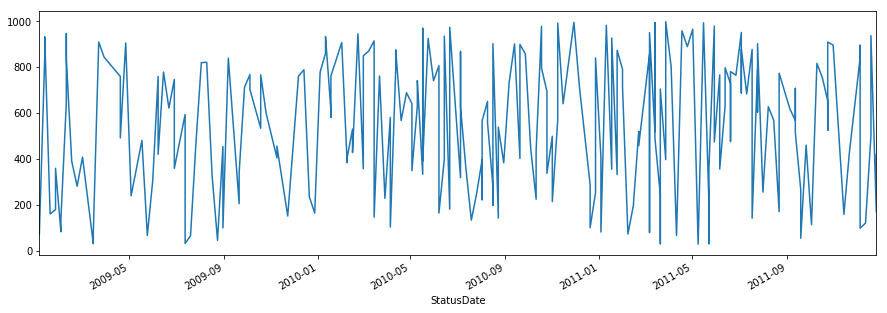

In [35]:
df['CustomerCount'].plot(figsize=(15,5)) # y.plot (panda dataframe index)